In [15]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [16]:
df=pd.read_csv("sentiment_dataset_250.csv")



In [17]:
df.head()


,Review,Sentiment
0,The product is terrible and stopped working.,0
1,I am extremely satisfied with this purchase.,1
2,Very happy with the results!,1
3,The product is terrible and stopped working.,0
4,The product is terrible and stopped working.,0


In [18]:
df.tail()

,Review,Sentiment
245,"I hate this app, it crashes every time.",0
246,"I love this app, it improves every day!",1
247,"I hate this app, it crashes every time.",0
248,"Horrible quality, not recommended at all.",0
249,Absolutely the worst experience.,0


In [19]:
df.info


<bound method DataFrame.info of                                            Review  Sentiment
0    The product is terrible and stopped working.          0
1    I am extremely satisfied with this purchase.          1
2                    Very happy with the results!          1
3    The product is terrible and stopped working.          0
4    The product is terrible and stopped working.          0
..                                            ...        ...
245       I hate this app, it crashes every time.          0
246       I love this app, it improves every day!          1
247       I hate this app, it crashes every time.          0
248     Horrible quality, not recommended at all.          0
249              Absolutely the worst experience.          0

[250 rows x 2 columns]>

In [20]:
df.isna().sum()


Review       0
Sentiment    0
dtype: int64

In [21]:
df.columns

Index(['Review', 'Sentiment'], dtype='object')

In [22]:
X = df["Review"]       
y = df["Sentiment"]    

In [23]:
# ------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)












Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50


Prediction for new text: [1]


In [25]:
# ------------------------------------------
# 6. Create and Train the Model
# ------------------------------------------
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
# ------------------------------------------
# 7. Evaluate the Model
# ------------------------------------------
y_pred = model.predict(X_test_tfidf)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [28]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        28

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [29]:
# ------------------------------------------
# 8. Test the Model with New Sentences
# ------------------------------------------
test_review = ["The product is amazing and I love it!"]
test_review_tfidf = vectorizer.transform(test_review)

In [30]:

prediction = model.predict(test_review_tfidf)
print("\nPrediction for new text:", prediction)


Prediction for new text: [1]


Confusion Matrix:
 [[22  0]
 [ 0 28]]


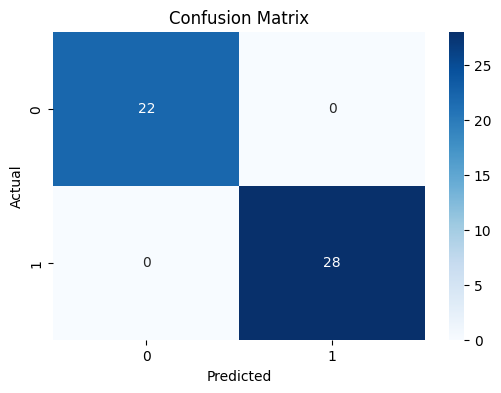

In [31]:
# ------------------------------------------
# Confusion Matrix
# ------------------------------------------
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


AUC Score: 1.0


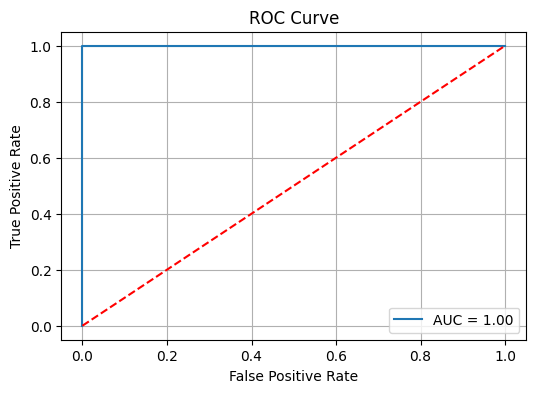

In [32]:
# ------------------------------------------
# ROC Curve & AUC
# ------------------------------------------
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_prob = model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print("AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "r--")  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
